In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_spss("1ResearchProjectData.sav")

In [3]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


In [5]:
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    216 non-null    category
dtypes: category(5), float64(2)
memory usage: 6.8 KB


In [7]:
df.shape

(216, 7)

In [8]:
df.isnull().sum()

Student     0
Teacher     0
Gender      0
Ethnic      0
Freeredu    0
Score       0
wesson      0
dtype: int64

In [9]:
df['Method'] = df['wesson'].apply(lambda x: 'Standard' if 'Ruger_Smith' in x else 'Traditional')

In [10]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson,Method
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith,Standard
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith,Standard
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith,Standard
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith,Standard
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith,Standard


In [11]:
df.Method.value_counts()

Standard       140
Traditional     76
Name: Method, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    216 non-null    category
 7   Method    216 non-null    category
dtypes: category(6), float64(2)
memory usage: 7.1 KB


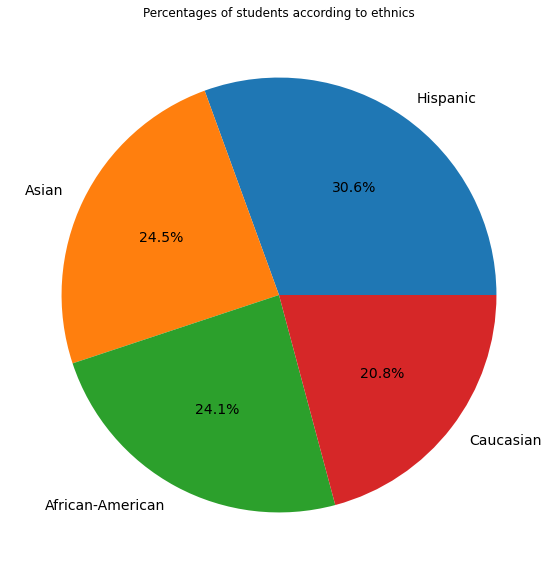

In [13]:
plt.figure(figsize = (10,10))
plt.pie(df.Ethnic.value_counts().values, labels = df.Ethnic.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 14})
plt.title('Percentages of students according to ethnics')
plt.show()

In [14]:
grouped_eg = pd.pivot_table(df, index = 'Ethnic', columns = 'Gender', aggfunc = 'count', values = 'Score')

<Figure size 1440x1440 with 0 Axes>

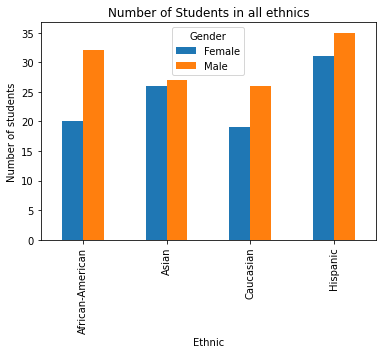

In [15]:
plt.figure(figsize = (20,20))
grouped_eg.plot(kind = 'bar')
plt.title('Number of Students in all ethnics')
plt.ylabel('Number of students')
plt.show()

In [16]:
grouped_eg

Gender,Female,Male
Ethnic,,
African-American,20,32
Asian,26,27
Caucasian,19,26
Hispanic,31,35


<AxesSubplot:xlabel='Method', ylabel='Score'>

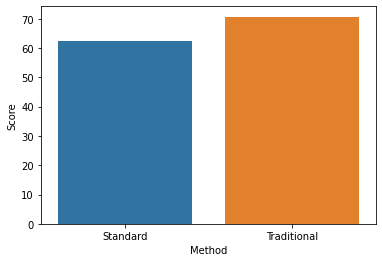

In [17]:
sns.barplot(x='Method', y = 'Score', data = df, ci = None)

In [18]:
print('Average score using Standard method: {}'.format(np.mean(df.Score[df.Method == 'Standard'])))
print('Average score using Traditional method: {}'.format(np.mean(df.Score[df.Method == 'Traditional'])))

Average score using Standard method: 62.33571428571429
Average score using Traditional method: 70.6842105263158


Text(0.5, 1.0, 'Average Math Score by Ethnics')

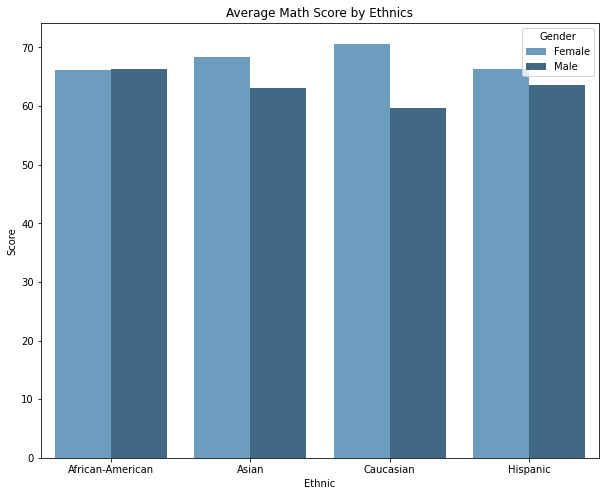

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Ethnic', y = 'Score', hue = 'Gender', data = df, ci = None, palette = 'Blues_d')
plt.title('Average Math Score by Ethnics')

In [20]:
np.round(pd.pivot_table(df, index = 'Gender', columns = 'Ethnic', values = 'Score'), 2)

Ethnic,African-American,Asian,Caucasian,Hispanic
Gender,,,,
Female,66.05,68.38,70.63,66.26
Male,66.34,63.11,59.73,63.54


In [21]:
df_trad = df[df.Method == 'Traditional']
df_stan = df[df.Method == 'Standard']

Text(0.5, 1.0, 'average math score using traditional method')

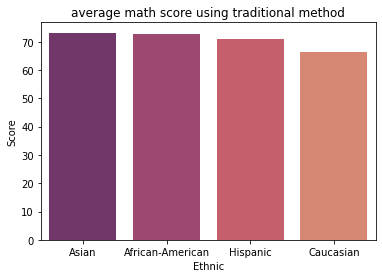

In [22]:
sns.barplot(data = df_trad, x='Ethnic', y='Score', ci=None, order = ['Asian', 'African-American', 'Hispanic', 'Caucasian'], palette = 'flare_r')
plt.title('average math score using traditional method')

In [23]:
np.round(df_trad.groupby('Ethnic')['Score'].mean(), 2)

Ethnic
African-American    72.89
Asian               73.19
Caucasian           66.32
Hispanic            70.83
Name: Score, dtype: float64

Text(0.5, 1.0, 'average math score using standard method')

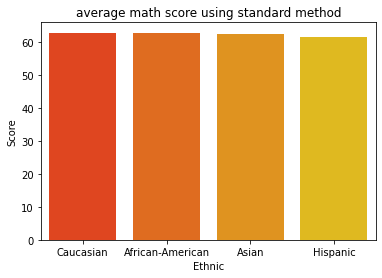

In [24]:
sns.barplot(data = df_stan, x='Ethnic', y='Score', ci=None, order = ['Caucasian', 'African-American', 'Asian', 'Hispanic'], palette = 'autumn')
plt.title('average math score using standard method')

In [25]:
np.round(df_stan.groupby('Ethnic')['Score'].mean(), 2)

Ethnic
African-American    62.71
Asian               62.46
Caucasian           62.88
Hispanic            61.60
Name: Score, dtype: float64

<AxesSubplot:xlabel='Teacher', ylabel='Score'>

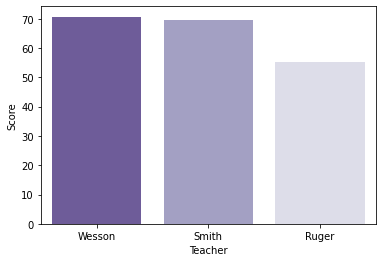

In [26]:
sns.barplot(x='Teacher', y = 'Score', data = df, ci = None, order = ['Wesson', 'Smith', 'Ruger'], palette = 'Purples_r')

In [27]:
df.groupby('Teacher')['Score'].mean()

Teacher
Ruger     55.267606
Smith     69.608696
Wesson    70.684211
Name: Score, dtype: float64

In [28]:
pd.pivot_table(index = 'Teacher', columns = 'Ethnic', values = 'Score', data = df)

Ethnic,African-American,Asian,Caucasian,Hispanic
Teacher,,,,
Ruger,55.222222,53.705882,56.909091,55.640000
Smith,71.125000,69.900000,67.266667,69.888889
Wesson,72.888889,73.187500,66.315789,70.826087


Text(0.5, 1.0, 'Students performance compared to each teacher')

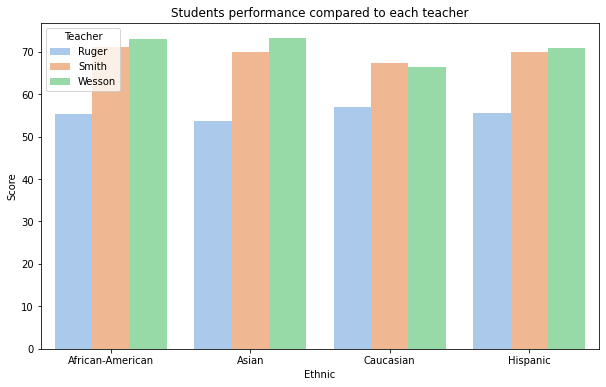

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'Teacher', ci = None, palette = 'pastel')
plt.title('Students performance compared to each teacher')